In [29]:
import numpy as np
import pandas as pd
import scipy.optimize as opt

# Load the data
df = pd.read_csv('AAPL.csv')

# Define the model parameters
def model(params, data):
    sigma, alpha, beta = params
    sigma2 = np.zeros(len(data))
    sigma2[0] = sigma**2
    for i in range(1, len(data)):
        sigma2[i] = sigma2[i-1] + alpha*(data[i-1] - beta*sigma2[i-1])
    return sigma2

# Define the loss function
def loss(params, data):
    sigma2 = model(params, data)
    return ((data - sigma2)**2).mean()

# Optimize the model parameters
params0 = [0.1, 0.1, 0.1]
bounds = [(0, 1), (0, 1), (0, 1)]
result = opt.minimize(loss, params0, args=(df['AAPL'],), bounds=bounds)

# Print the optimized parameters
print(result.x)

# Predict the stock price using the optimized parameters
sigma2 = model(result.x, df['AAPL'])
prediction = np.random.normal(loc=df['AAPL'], scale=np.sqrt(sigma2))
print(prediction)

[0.10001182 0.94097637 0.99966099]
[7.08240036e-02 1.04677048e-01 4.13255210e-01 ... 1.22025977e+02
 1.11714023e+02 1.27473821e+02]


In [25]:
import pandas as pd
import pandas_datareader as pdr

import yfinance as yf
yf.pdr_override()

import pandas_datareader.data as pdr

AAPL = pdr.get_data_yahoo('AAPL')
AAPL = AAPL.reindex(columns=['Close'])
AAPL = AAPL.round(2)

# Print the data
AAPL.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed


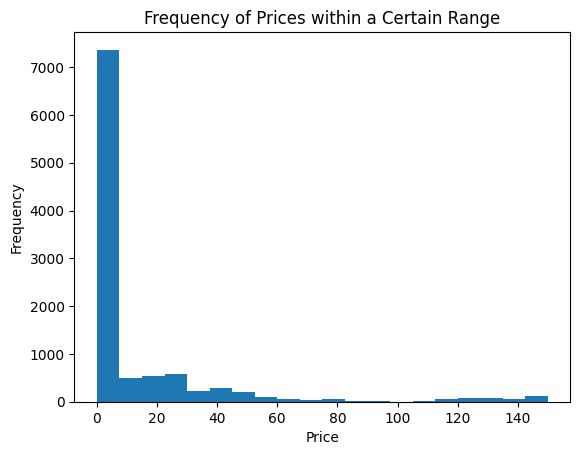

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('AAPL.csv')

# Set the range or price that you want to highlight
low = 0
high = 150

# Select the data within the specified range
selected = df[(df['AAPL'] >= low) & (df['AAPL'] <= high)]

# Plot a histogram of the selected data
plt.hist(selected['AAPL'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency of Prices within a Certain Range')
plt.show()
